In [1]:
words = open('names.txt', 'r').read().splitlines()

# Learning about Bigrams
This notebook goes through how we can use a Neural Network to model a bigram-based model. Essentially the goal of the model is to predict the next character, based on the current character. First, we will try to explore this idea using basic mathematics, then we will see how we can do the same thing with a simple single-layered NN.

In [4]:
import torch

### Try to visualize the bigrams that exist within the names.txt file

In [6]:
# Why is it 27, 27? Because the dataset has lowercase alphabets, 
# and then we need a character to denote the beginning and the end of a name 
N = torch.zeros((27, 27), dtype=torch.int32)

In [7]:
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0 
itos = {i: s for s, i in stoi.items()}

In [11]:
# Try to update the counts for all the names that you see in the dataset 
for w in words: 
    chars = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chars, chars[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

(-0.5, 26.5, 26.5, -0.5)

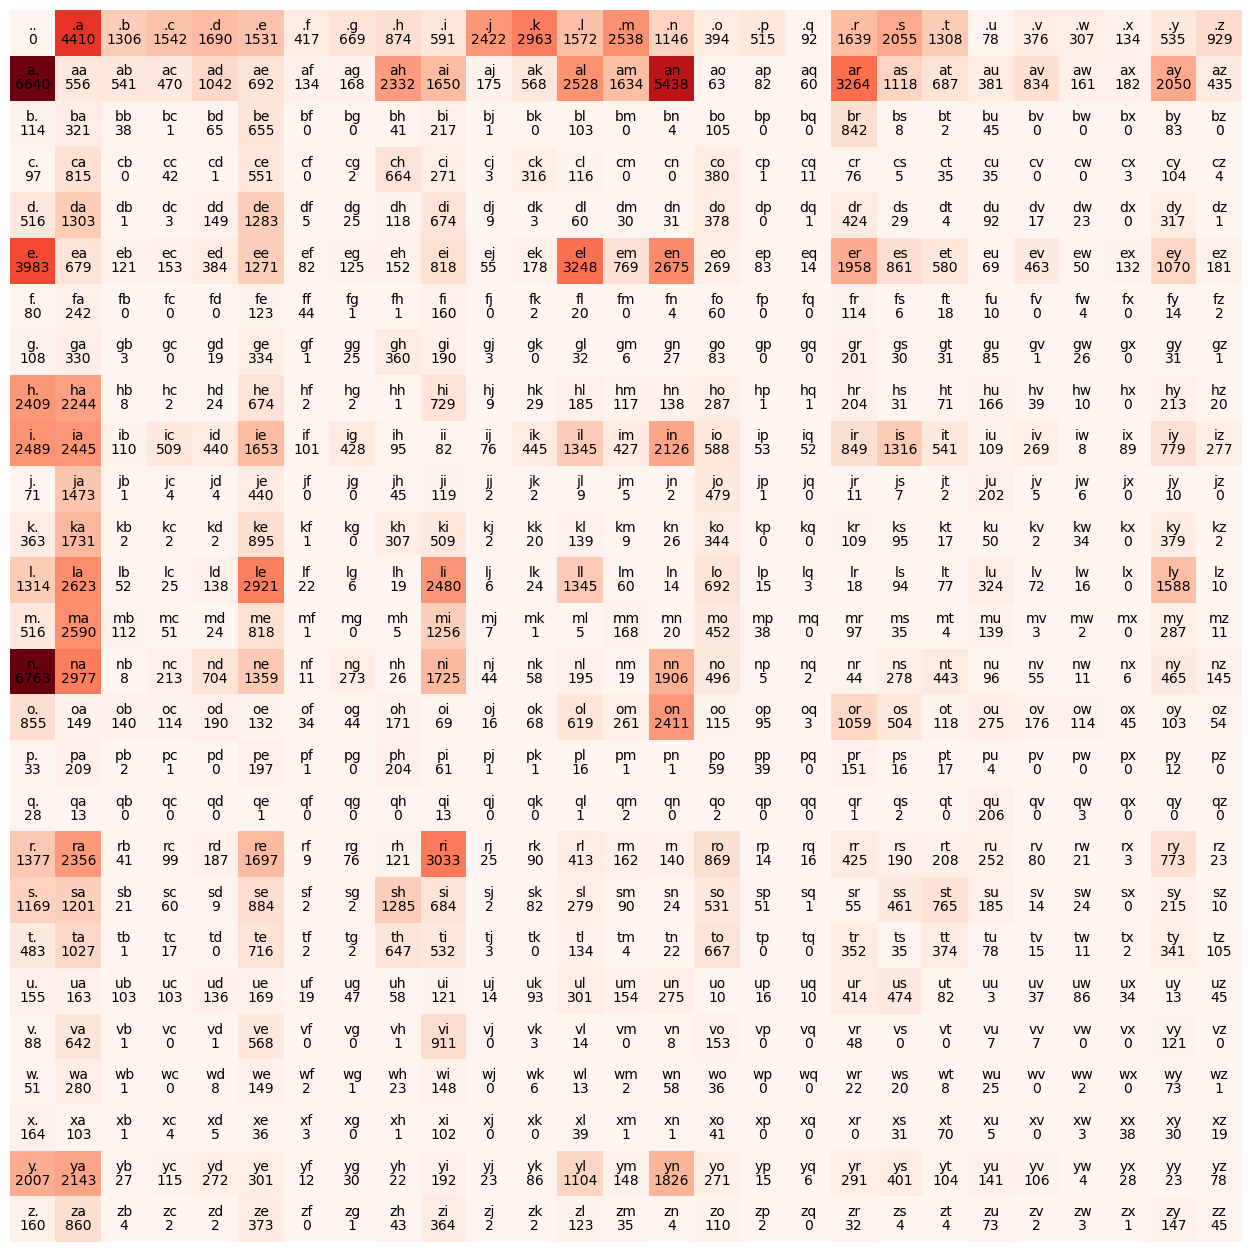

In [17]:
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Reds')
for i in range(27):
    for j in range(27):
        bigram = itos[i] + itos[j]
        plt.text(j, i, bigram, ha="center", va="bottom", color='black')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='black')
plt.axis('off')        

In [35]:
# This will let me replicate the results so that I know that I'm on track
seed = 2147483647
g = torch.Generator().manual_seed(seed)

In [36]:
P = (N + 1).float() # Why +1? Because we are trying to smoothen out the model, and avoid counts of 0 

In [37]:
P /= P.sum(1, keepdims=True)

In [38]:
# Predict the next word just using a multinomial distributi
for i in range(5):
    

tensor([[3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
         1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
         4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
         5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
         4.2109e-03, 1.6719e-02, 2.9008e-02],
        [1.9583e-01, 1.6425e-02, 1.5983e-02, 1.3889e-02, 3.0756e-02, 2.0435e-02,
         3.9809e-03, 4.9835e-03, 6.8796e-02, 4.8685e-02, 5.1899e-03, 1.6779e-02,
         7.4575e-02, 4.8213e-02, 1.6039e-01, 1.8872e-03, 2.4475e-03, 1.7988e-03,
         9.6279e-02, 3.2997e-02, 2.0288e-02, 1.1264e-02, 2.4623e-02, 4.7771e-03,
         5.3963e-03, 6.0480e-02, 1.2857e-02],
        [4.3039e-02, 1.2051e-01, 1.4596e-02, 7.4850e-04, 2.4701e-02, 2.4551e-01,
         3.7425e-04, 3.7425e-04, 1.5719e-02, 8.1587e-02, 7.4850e-04, 3.7425e-04,
         3.8922e-02, 3.7425e-04, 1.8713e-03, 3.9671e-02, 3.7425e-04, 3.7425e-04,
         3.1549e-

In [ ]:
torch.multinomial(p)